# Fourier-Analyse

## Fourierreihen

Jedes periodische Signal kann als *Summe von Sinus- und Cosinusfunktionen* mit Frequenzen von ganzzahligen Vielfachen der Grundfrequenz des Signals beschrieben werden. Dies ist die sogenannten **Fourierreihe**, Fourierreihen-Entwicklung/oder -Zerlegung.

<Figure size 1000x500 with 0 Axes>

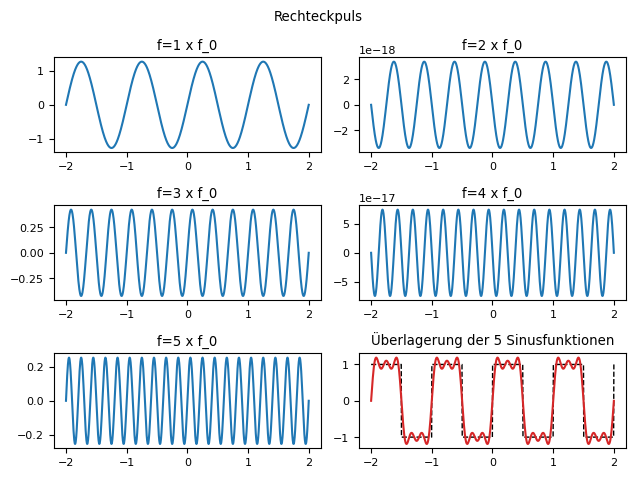

In [1]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
from scipy import signal 
import scipy.integrate as spi
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(10,5)) # Plot-Größe
plt.rcParams['font.size'] = 12; # Schriftgröße

T = 1
t_range = np.linspace(-2*T, 2*T, 1000, endpoint = True)

# Rechteckpuls:
f = lambda t: signal.square(2 * np.pi * 1/T * t)

y_true = f(t_range)

#function that computes the real fourier couples of coefficients (a0, 0), (a1, b1)...(aN, bN)
def compute_real_fourier_coeffs(func, N):
    result = []
    for n in range(N+1):
        an = (2./T) * spi.quad(lambda t: func(t) * np.cos(2 * np.pi * n * t / T), 0, T)[0]
        bn = (2./T) * spi.quad(lambda t: func(t) * np.sin(2 * np.pi * n * t / T), 0, T)[0]
        result.append((an, bn))
    return np.array(result)

#function that computes the real form Fourier series using an and bn coefficients
def fit_func_by_fourier_series_with_real_coeffs(t, AB):
    result = 0.
    A = AB[:,0]
    B = AB[:,1]
    for n in range(0, len(AB)):
        if n > 0:
            result +=  A[n] * np.cos(2. * np.pi * n * t / T) + B[n] * np.sin(2. * np.pi * n * t / T)
        else:
            result +=  A[0]/2.
    return result

N = 5
COLs = 2 #cols of plt
ROWs = 1 + (N-1) // COLs #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.suptitle('Rechteckpuls')

AB = compute_real_fourier_coeffs(f, N)
y_approx = fit_func_by_fourier_series_with_real_coeffs(t_range, AB)
for n in range(1, N + 1):
    row = (n-1) // COLs
    col = (n-1) % COLs
    axs[row, col].set_title('f=' + str(n) + ' x f_0')
    axs[row, col].plot(t_range, AB[:,1][n] * np.sin(2. * np.pi * n * t_range / T))
    y_approx = fit_func_by_fourier_series_with_real_coeffs(t_range, AB)
axs[2, 1].plot(t_range, f(t_range),'--', color='k', lw = 1)
axs[2, 1].plot(t_range, y_approx, color='tab:red')
axs[2, 1].set_title('Überlagerung der 5 Sinusfunktionen')
plt.tight_layout()   
plt.show()

Im folgenden Bild seht ihr einen Rechteckpuls und die zugehörige Fourierreihe unter Einbeziehung verschiedener Anzahl von Sinus- bzw. Cosinusfunktionen. Je mehr Sinusfunktionen bei ganzzahligen Vielfachen der Grundfrequenz des Rechteckpulses miteinbezogen werden, desto genauer können Rechtecksignale rekonstruiert werden.

<Figure size 1000x500 with 0 Axes>

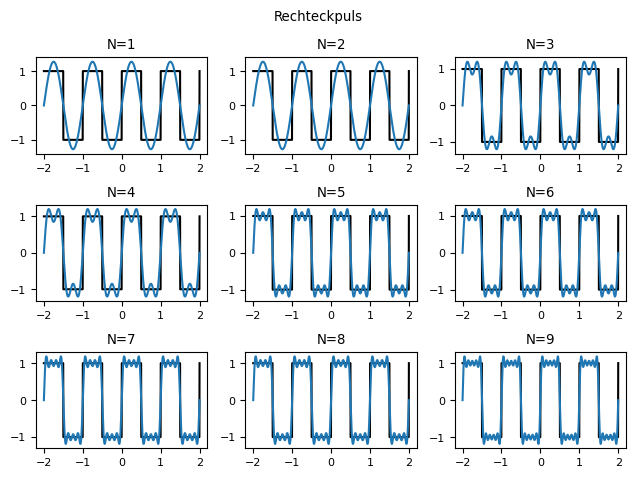

In [2]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
from scipy import signal 
import scipy.integrate as spi
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(10,5)) # Plot-Größe
plt.rcParams['font.size'] = 12; # Schriftgröße

T = 1
t_range = np.linspace(-2*T, 2*T, 1000, endpoint = True)

# Rechteckpuls:
f = lambda t: signal.square(2 * np.pi * 1/T * t)

y_true = f(t_range)

#function that computes the real fourier couples of coefficients (a0, 0), (a1, b1)...(aN, bN)
def compute_real_fourier_coeffs(func, N):
    result = []
    for n in range(N+1):
        an = (2./T) * spi.quad(lambda t: func(t) * np.cos(2 * np.pi * n * t / T), 0, T)[0]
        bn = (2./T) * spi.quad(lambda t: func(t) * np.sin(2 * np.pi * n * t / T), 0, T)[0]
        result.append((an, bn))
    return np.array(result)

#function that computes the real form Fourier series using an and bn coefficients
def fit_func_by_fourier_series_with_real_coeffs(t, AB):
    result = 0.
    A = AB[:,0]
    B = AB[:,1]
    for n in range(0, len(AB)):
        if n > 0:
            result +=  A[n] * np.cos(2. * np.pi * n * t / T) + B[n] * np.sin(2. * np.pi * n * t / T)
        else:
            result +=  A[0]/2.
    return result

maxN = 9
COLs = 3 #cols of plt
ROWs = 1 + (maxN-1) // COLs #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.suptitle('Rechteckpuls')
#fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
for N in range(1, maxN + 1):
    AB = compute_real_fourier_coeffs(f, N)
    #AB contains the list of couples of (an, bn) coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_real_coeffs(t_range, AB)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

    row = (N-1) // COLs
    col = (N-1) % COLs
    axs[row, col].set_title('N=' + str(N))
    axs[row, col].plot(t_range, f(t_range), color='k')
    axs[row, col].plot(t_range, y_approx, color='tab:blue')
plt.tight_layout()   
plt.show()

### Reelle Fourierreihe

Die **reelle Darstellung der Fourierreihe** für eine Funktion $x(t)$ sieht wiefolgt aus:

$$x(t) = x_0 + \sum_{k=1}^{\infty} a_k \cos(2\pi k f_0 t) + \sum_{k=1}^{\infty} b_k \sin(2\pi k f_0 t)$$

$x_0$ ist hierbei der Gleichanteil (Mittelwert) des Signals, der sich wieder über den arithmetischen Mittelwert berechnet:

$$x_0 = \frac{1}{T} \int_{-T/2}^{T/2} x(t) dt = \frac{a_0}{2}$$

Die (reellen) Koeffizienten $a_k$ und $b_k$ nehmen für jedes Messsignal eine anderen Wert an und berechnen sich über:

$$a_k = \frac{2}{T}  \int_{-T/2}^{T/2} x(t) \cos(2\pi k f_0 t) dt $$

und 

$$b_k = \frac{2}{T}  \int_{-T/2}^{T/2} x(t) \sin(2\pi k f_0 t) dt$$

Jedes Integral muss immer über eine Periode ausgeführt werden. Ob hier die Grenzen $\pm T/2$ gewählt werden, oder von $0$ bis $T$ integriert wird, ist jedem selber überlassen. 

Die Koeffizienten geben die Amplitude der Sinus- bzw. Cosinusfunktionen an, aus denen ein periodisches Signal rekonstruiert wird. Die Koeffizienten werden für die einzelnen Frequenzen berechnet und über die Vielzahl der Grundfrequenz in den folgenden Plots dargestellt. Um eine Rechteckfunktion in einer Fourierreihe zu entwickeln, werden viele höhere Harmonische benötigt. Bei einem Dreickecksignal sieht das anders aus.

<Figure size 1000x500 with 0 Axes>

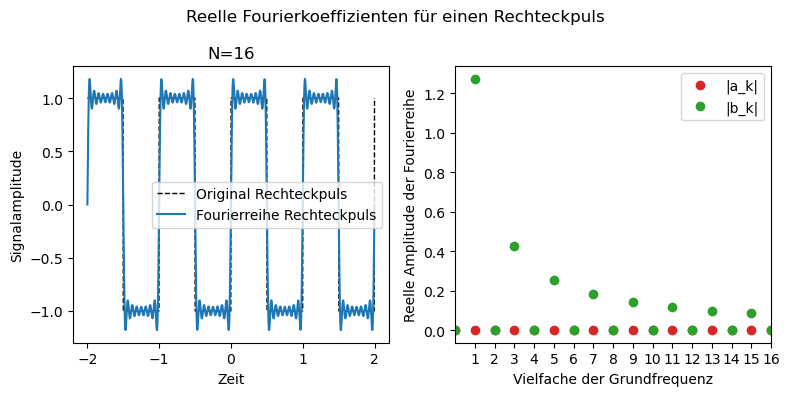

In [3]:
maxN = 16
plt.figure(figsize=(10,5)) # Plot-Größe
plt.rcParams['font.size'] = 10

# Rechteckpuls:
f = lambda t: signal.square(2 * np.pi * 1/T * t)

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
i = []
for N in range(1, maxN + 1):
    i.append(N)
    AB = compute_real_fourier_coeffs(f, N)
    #AB contains the list of couples of (an, bn) coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_real_coeffs(t_range, AB)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

plt.figure(figsize=(8,4)) # Plot-Größe

plt.subplot(1,2,1)
plt.title('N=' + str(N))
plt.plot(t_range, f(t_range),'--',lw=1, color='k', label = 'Original Rechteckpuls')
plt.plot(t_range, y_approx, color='tab:blue', label = 'Fourierreihe Rechteckpuls')
plt.legend()
plt.xlabel('Zeit')
plt.ylabel('Signalamplitude')

plt.subplot(1,2,2)
plt.plot(abs(AB[:,0]), 'o', color='tab:red', label = '|a_k|')
plt.plot(abs(AB[:,1]), 'o', color='tab:green', label = '|b_k|')
plt.legend()
plt.xlabel('Vielfache der Grundfrequenz')
plt.ylabel('Reelle Amplitude der Fourierreihe')
plt.xticks(i)
plt.xlim([0,N])
plt.suptitle('Reelle Fourierkoeffizienten für einen Rechteckpuls')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

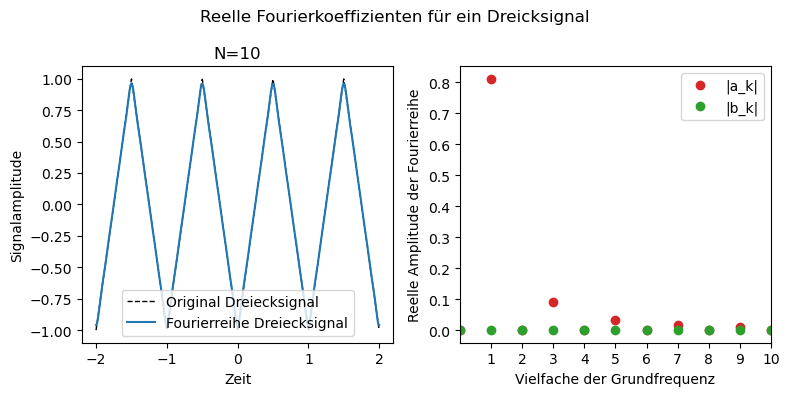

In [4]:
# Dreieckfunktion:
f = lambda t: signal.sawtooth(2 * np.pi * 1/T * t, 0.5)

plt.figure(figsize=(10,5)) # Plot-Größe
maxN = 10
plt.rcParams['font.size'] = 10

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
i = []
AB = []
for N in range(1, maxN + 1):
    i.append(N)
    AB = compute_real_fourier_coeffs(f, N)
    #AB contains the list of couples of (an, bn) coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_real_coeffs(t_range, AB)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

plt.figure(figsize=(8,4)) # Plot-Größe

plt.subplot(1,2,1)
plt.title('N=' + str(N))
plt.plot(t_range, f(t_range),'--',lw=1, color='k', label = 'Original Dreiecksignal')
plt.plot(t_range, y_approx, color='tab:blue', label = 'Fourierreihe Dreiecksignal')
plt.legend()
plt.xlabel('Zeit')
plt.ylabel('Signalamplitude')

plt.subplot(1,2,2)
plt.plot(abs(AB[:,0]), 'o', color='tab:red', label = '|a_k|')
plt.plot(abs(AB[:,1]), 'o', color='tab:green', label = '|b_k|')
plt.legend()
plt.xlabel('Vielfache der Grundfrequenz')
plt.ylabel('Reelle Amplitude der Fourierreihe')
plt.xticks(i)
plt.xlim([0,N])
plt.suptitle('Reelle Fourierkoeffizienten für ein Dreicksignal')
plt.tight_layout()
plt.show()

`````{admonition} Aufgabe
:class: tip
Woran könnte es liegen, dass das Rechtecksignal höhere Harmonische benötigt als das Dreiecksignal? Im Python-Code könnt ihr die Flanke des Dreicksignals ändern indem ihr in `f = lambda t: signal.sawtooth(2 * np.pi * 1/T * t, 0.5)` den letzten Parameter, die 0.5, entfernt. Was ändert sich jetzt?
`````

Es kann übrigens folgendes gezeigt werden, was für die Praxis oft sehr hilfreich ist, da es die Anzahl von Integralberechnungen reduziert:

* für **gerade** Funktionen, also wenn $x(t) = x(-t)$ gilt, dann sind alle $b_k = 0$ (es existieren nur noch Cosinus-Terme)
* für **ungerade** Funktionen, also wenn $x(t) = -x(-t)$ gilt, dann sind alle $a_k = 0$ (es existieren nur noch Sinus-Terme)
* einen Gleichanteil $x_0$ kann es folglich bei ungeraden FUnktionen *nicht* geben. 

Das ist in den obigen Darstellungen bereits zu sehen. Für den Rechteckpuls sind die $a_k = 0$, während für das Dreiecksignal die $b_k = 0$ sind. 

### Komplexe Fourierreihe
Eine alternative Schreibweise ist die **komplexe Darstellung**. Hierbei wird eine periodische Funktion als eine Überlagerung von komplexen Exponentialfunktionen (anstelle von Sinus- und Cosinusfunktionen) dargestellt:

$$x(t) = \sum_{k=-\infty}^{\infty} \underline{c}_k \mathrm e^{j 2\pi k f_0 t}$$

Diese liefert den Vorteil, dass nur eine Art von Koeffizienten berechnet werden muss:

$$\underline {c}_k = \frac{1}{T}  \int_{-T/2}^{T/2} x(t) \mathrm e^{- j 2\pi k f_0 t} dt $$

Trotz der Rechnung mit komplexen Funktionen handelt es sich immer noch um eine reelle Funktion. Für $k=0$ erhält man wieder den Gleichanteil:

$$\underline c_0 = x_0$$

Außerdem sieht man, dass die Werte für $\underline {c}_{-k}$ und $\underline {c}_k$ zueinander komplex konjugiert sind:

$$\underline {c}_{-k} = \underline {c}_k^*$$

### Umrechnung zwischen reellen und komplexen Fourier-Koeffizienten
Mittels der Euler-Formel

$$e^{j\omega t} = \cos(\omega t) + j \sin(\omega t)$$

lassen sich die Koeffizienten aus reeller Fourierreihen-Entwicklung und komplexer Darstellung ineinander umformen. Durch die Addition eines zueinander komplex konjugierten Koeffizientenpaares lässt sich der reelle Koeffizient $a_k$ bestimmen:

$$a_k = \underline{c}_{k} + \underline{c}_{-k}$$

und analog fällt bei der Subtraktion der Realteil weg, sodass nach zusätzliche Multiplikation mit $j$ $b_k$ berechnet wird:

$$b_k = j (\underline{c}_{k} - \underline{c}_{-k})$$

Andersherum können aus den reellen Koeffizienten auch die komplexen Koeffizienten berechnet werden:

$$\underline c_k = \frac{1}{2} (a_k - j b_k)$$

$$\underline c_{-k} = \frac{1}{2} (a_k + j b_k) = \underline c_k^*$$

An dieser Stelle wollen wir noch mal festhalten, dass die Koeffizienten der Fourierreihe eine Schwingung oder ein Messsignal im Frequenzbereich eindeutig beschreibt. In Ihrer Gesamtheit stellen diese Koeffizienten das **Spektrum** des Signals dar. Dies ist zumindest wahr für die hier dargestellte mathematische Betrachtung mittels Fourier-Transformation. Ein Spektrumanalysator wertet hingegen bei der jeder Einzelmessung in einem begrenzten Bereich Frequenzbereich das Signal aus, was häufig noch durch einen Bandpassfilter geschleust wurde. Dabei gehen Informationen über die Phasenlage verloren. 

<Figure size 1000x500 with 0 Axes>

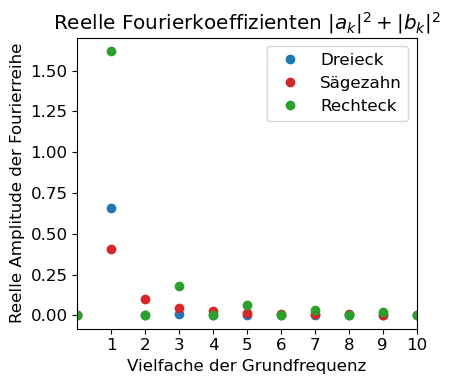

In [5]:
# Dreieckfunktion:
f_drei = lambda t: signal.sawtooth(2 * np.pi * 1/T * t, 0.5)
f_saege = lambda t: signal.sawtooth(2 * np.pi * 1/T * t)
f_eck = lambda t: signal.square(2 * np.pi * 1/T * t)

maxN = 10
plt.figure(figsize=(10,5)) # Plot-Größe
plt.rcParams['font.size'] = 12; # Schriftgröße

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
i = []
AB_drei = []
AB_saege = []
AB_eck = []
for N in range(1, maxN + 1):
    i.append(N)
    AB_drei = compute_real_fourier_coeffs(f_drei, N)
    AB_saege = compute_real_fourier_coeffs(f_saege, N)
    AB_eck = compute_real_fourier_coeffs(f_eck, N)

    #AB contains the list of couples of (an, bn) coefficients for n in 1..N interval.

plt.figure(figsize=(8,4)) # Plot-Größe

plt.subplot(1,2,2)
plt.plot(abs(AB_drei[:,0])**2+abs(AB_drei[:,1])**2, 'o', color='tab:blue', label = 'Dreieck')
plt.plot(abs(AB_saege[:,0])**2+abs(AB_saege[:,1])**2, 'o', color='tab:red', label = 'Sägezahn')
plt.plot(abs(AB_eck[:,0])**2+abs(AB_eck[:,1])**2, 'o', color='tab:green', label = 'Rechteck')

plt.legend()
plt.xlabel('Vielfache der Grundfrequenz')
plt.ylabel('Reelle Amplitude der Fourierreihe')
plt.xticks(i)
plt.xlim([0,N])
plt.title(r'Reelle Fourierkoeffizienten $|a_k|^2 + |b_k|^2$')
plt.tight_layout()
plt.show()

## Fourier-Transformation 
<a id="Sec-FFT"></a>

Die Fourier-Transformation ist Teil der Spektralanalyse in der Messtechnik. Sie basiert auf der Grundidee, dass, wie wir eben gesehen haben, sich jede periodische Funktion aus Sinus- und Cosinusfunktionen schreiben lässt. Das Ziel ist es, die Anteile dieser Schwingungen sichtbar zu machen. Die Fourier-Transformation ist eine mathematische Methode mit der nun auch aperiodische Signale in ein kontinuierliches Spektrum zerlegt werden. Die Fourier-Transformation ist ein Werkzeug, mit dem man ein Signal (siehe [Messsignale](Messsignale.ipynb)) nehmen und die Leistung jeder einzelnen Frequenz darin sehen kann. 

### Anwendung
<a id="SubSec-Anwendung_FFT"></a>

Die Fourier-Transformation ist in vielen Anwendungen nützlich. 

Ein Spektralanalyse, wie sie die Fouriertransformation durchführt, eignet sich besonders gut zur Zustandsüberwachung. Hier können Motoren, Turbinen, Sägen, Kugellager uvm, im Prinzip alles was rotiert, überwacht werden. Die spezifischen Frequenz jedes Kugellagers kann beispielsweise überwacht werden. Sollte sich die Amplitude über die Zeit verändert, kann dies ein Indiz dafür sein, dass eine Kugel ins Lager gefallen ist oder das Lager einen Schaden bekommen hat. Verschlechtert sich das Verhalten kann frühzeitig gegengewirkt werden, indem das Kugellager ausgetauscht wird. Das heißt auch Fehlerfrüherkennung, Fehlerdiagnose und Trendanalysen ("predictive maintenance") werden häufig im Frequenzraum durchgeführt. 

Shazam und andere Musikerkennungsdienste verwenden beispielsweise die Fourier-Transformation, um Lieder zu erkennen. Bei der JPEG-Komprimierung wird eine Variante der Fourier-Transformation verwendet, um die hochfrequenten Komponenten von Bildern zu entfernen. Bei der Spracherkennung werden die Fourier-Transformation und verwandte Transformationen verwendet, um die gesprochenen Wörter aus dem Audiomaterial wiederherzustellen.

Im Allgemeinen benötigst du die Fourier-Transformation, wenn du die Frequenzen in einem Signal betrachten musst. Wenn die Arbeit mit einem Signal im Zeitbereich schwierig ist, lohnt es sich, die Fourier-Transformation zu verwenden, um es in den Frequenzbereich zu übertragen. Im nächsten Abschnitt werden Sie die Unterschiede zwischen dem Zeit- und dem Frequenzbereich kennen lernen.

### Zeit- vs. Frequenzbereich

Du wirst im Folgenden immer wieder auf die Begriffe Zeitbereich und Frequenzbereich stoßen. Diese beiden Begriffe beziehen sich auf zwei verschiedene Arten der Betrachtung eines Signals, entweder als seine Frequenzkomponenten oder als Information, die sich über die Zeit verändert (siehe [Messsignale](Messsignale.ipynb)).

Im Zeitbereich ist ein Signal eine Welle, deren Amplitude (y-Achse) über die Zeit (x-Achse) variiert. Sie sind wahrscheinlich daran gewöhnt, Diagramme im Zeitbereich zu sehen, wie z. B. dieses hier:

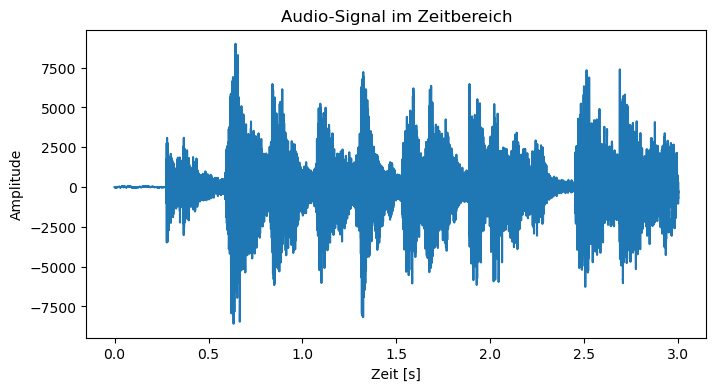

In [6]:
import IPython.display as ipd
ipd.Audio('CantinaBand3.wav') # load a local WAV file

from scipy.io.wavfile import read #import the required function from the module
import matplotlib.pyplot as plt
import numpy as np
samplerate, data = read('CantinaBand3.wav')
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(8,4)) # Plot-Größe
plt.rcParams['font.size'] = 10; # Schriftgröße

plt.plot(time,data, 'tab:blue')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.title('Audio-Signal im Zeitbereich')
plt.show()

Dies ist ein Bild eines Audiosignals, also eines Signals im Zeitbereich. Die horizontale Achse steht für die Zeit, die vertikale Achse für die Amplitude.

Im Frequenzbereich wird ein Signal als eine Reihe von Frequenzen (x-Achse) dargestellt, denen jeweils eine Leistung (y-Achse) zugeordnet ist. Das folgende Bild zeigt das obige Audiosignal nach der Fourier-Transformation:

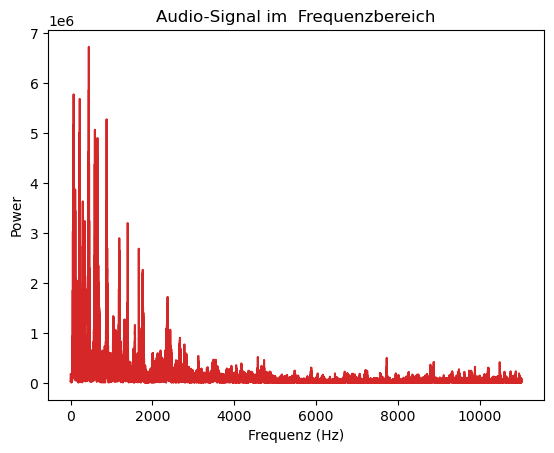

In [7]:
# faster FFT: returns only half output:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(data)
xf = rfftfreq(len(data), 1 / samplerate)

plt.plot(xf,np.abs(yf),'tab:red') # plotting the spectrum
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Power')
plt.title('Audio-Signal im  Frequenzbereich')
plt.show()

Hier wird das Audiosignal von vorher durch seine einzelnen Frequenzen dargestellt. Jeder Frequenz entlang der Unterseite ist eine Leistung zugeordnet, wodurch das Spektrum entsteht.

### Typen von Fourier-Transformationen

Die Fourier-Transformation kann in verschiedene Arten von Transformationen unterteilt werden. Die grundlegendste Unterteilung basiert auf der Art der Daten, mit denen die Transformation arbeitet: kontinuierliche Funktionen oder diskrete Funktionen. 
Die Begriffe DFT und FFT werden oft synonym verwendet. Sie sind jedoch nicht ganz dasselbe. Die **fast (kontinuierliche) Fourier-Transformation (FFT)** ist ein Algorithmus zur Berechnung der **diskreten Fourier-Transformation (DFT)**, während die DFT die Transformation selbst ist.

Die **diskrete Fourier-Transformation (DFT)** (z.B. auf digitalisierte, abgetastete Messwerte angewendet) entspricht der Fourierreihen:

$$X_\mathrm d (k \Delta f) = \sum_{i = 0}^{N-1} x(i\Delta t) \mathrm e^{-j 2\pi  k \Delta f i \Delta t}$$

wobei $\Delta f = 1/T$ mit der Periode $T = N\cdot \Delta T$, $N$ ist die Anzahl der Samples. 

Die **kontinuierliche Fourier-Transformation** ist für beliebige Funktionen $f(t)$ definiert, d.h. die Periode kann unendlich lang werden und die Funktion kann aperiodisches Verhalten aufweisen:

$$\mathcal F(x(t)) = X(j\omega) = \int_{-\infty}^{\infty} x(t) \mathrm e^{-j \omega t} dt$$

Die Rücktransformation ist wiefolgt definiert: 

$$x(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} X(j\omega) \mathrm e^{j \omega t} d\omega$$

Der Vollständigkeitshalber soll an dieser Stelle auch noch die **Laplace-Transformation** erwähnt werden, die sich wiefolgt berechnen lässt:

$$\mathcal L(x(t)) = X(s) = \int_{0}^{\infty} x(t) \mathrm e^{-st} dt$$

mit der Rücktransformation

$$x(t) = \frac{1}{2\pi}\int_{0}^{\infty} X(s) \mathrm e^{st} ds$$

Hierbei ist $s= \sigma + j\omega$ eine komplexe Zahl (anstelle von $\omega$) und wird für dynamische Messsysteme wichtig werden.  

### Eigenschaften
<a id="SubSec-Eigenschaften_FFT"></a>

Jeder Fourier-Transformation hat folgende wichtige **Eigenschaften**, die das Leben und Rechnen im Frequenzraum erheblich erleichtern können:

* **Linearität**: $\mathcal F(ax_1 + bx_2) = a\mathcal F(x_1)+ b \mathcal F(x_2)$
* **Ableitung**: $\mathcal F(\dot x) = j\omega \cdot \mathcal F(x)$
* **Faltung**:$ \mathcal F(x_1*x_2) = \mathcal F(x_1) \cdot \mathcal F(x_1)$
    * Faltung im Zeichbereich ist zum Vergleich sehr kompliziert: $(x_1 \ast x_2)(t) = \int_{-\infty}^{\infty} x_1(\tau)x_2(t-\tau) \mathrm{d}\tau$
* **Zeitverschiebung**: $\mathcal F(x(t-\tau)) = \mathcal F(x(t)) \cdot \mathrm e^{-j\omega \tau}$


### Beispiele von FFTs

<Figure size 1000x500 with 0 Axes>

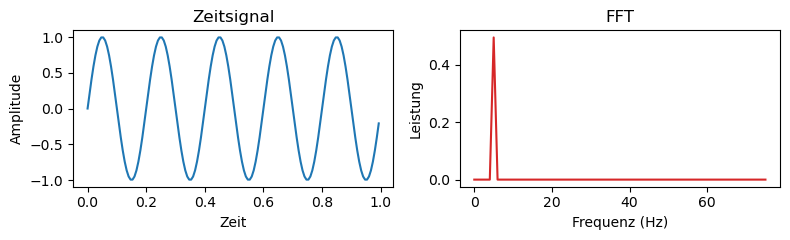

In [8]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(10,5)) # Plot-Größe
plt.rcParams['font.size'] = 10; # Schriftgröße


Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector
ff = 5;   # frequency of the signal

# Sinusschwingung
y = np.sin(2*np.pi*ff*t)

y_normalized = np.int16((y / y.max()) * 32767)
# Note the extra 'r' at the front
yf = rfft(y_normalized)/5e6
xf = rfftfreq(len(y), 1 / Fs)

plt.figure(figsize=(8,2.5)) # Plot-Größe
plt.subplot(1,2,1)
plt.plot(t,y)
plt.xlabel('Zeit')
plt.ylabel('Amplitude')
plt.title('Zeitsignal')
plt.subplot(1,2,2)
plt.plot(xf,abs(yf),'tab:red') # plotting the spectrum
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung')
plt.title('FFT')
plt.tight_layout()
plt.show()

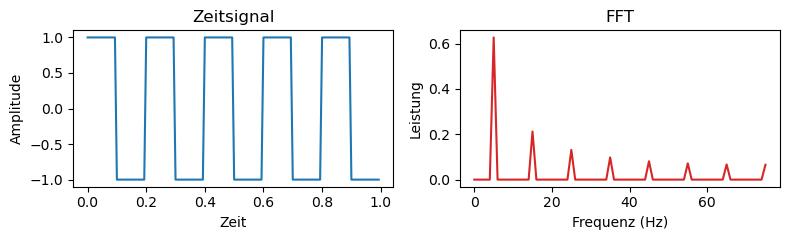

In [9]:
# Rechteckschwingung
Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector
ff = 5;   # frequency of the signal
y = signal.square(2 * np.pi * ff * t)

y_normalized = np.int16((y / y.max()) * 32767)
# Note the extra 'r' at the front
yf = rfft(y_normalized)/5e6
xf = rfftfreq(len(y), 1 / Fs)

plt.figure(figsize=(8,2.5)) # Plot-Größe
plt.subplot(1,2,1)
plt.plot(t,y)
plt.xlabel('Zeit')
plt.ylabel('Amplitude')
plt.title('Zeitsignal')
plt.subplot(1,2,2)
plt.plot(xf,abs(yf),'tab:red') # plotting the spectrum
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung')
plt.title('FFT')
plt.tight_layout()
plt.show()

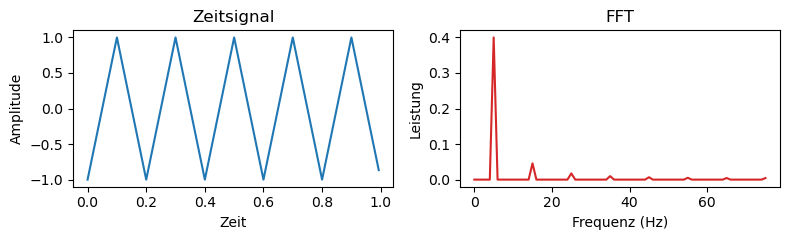

In [10]:
Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector
ff = 5;   # frequency of the signal
y =  signal.sawtooth(2 * np.pi * ff * t, 0.5)

y_normalized = np.int16((y / y.max()) * 32767)
# Note the extra 'r' at the front
yf = rfft(y_normalized)/5e6
xf = rfftfreq(len(y), 1 / Fs)

plt.figure(figsize=(8,2.5)) # Plot-Größe
plt.subplot(1,2,1)
plt.plot(t,y)
plt.xlabel('Zeit')
plt.ylabel('Amplitude')
plt.title('Zeitsignal')
plt.subplot(1,2,2)

plt.plot(xf,abs(yf),'tab:red') # plotting the spectrum

plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung')
plt.title('FFT')
plt.tight_layout()
plt.show()

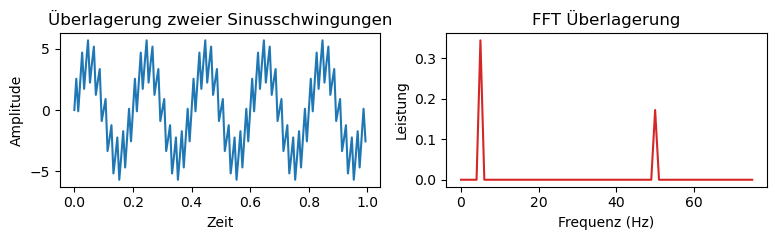

In [11]:
Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector
ff = 5;   # frequency of the signal
a1 = 4.
a2 = 2.
y =  a1 * np.sin(2 * np.pi * ff * t) + a2 * np.sin(10 * 2 * np.pi * ff * t)

y_normalized = np.int16((y / y.max()) * 32767)
yf = rfft(y_normalized)/5e6
xf = rfftfreq(len(y), 1 / Fs)

plt.figure(figsize=(8,2.5)) # Plot-Größe
plt.subplot(1,2,1)
plt.plot(t,y)
plt.xlabel('Zeit')
plt.ylabel('Amplitude')
plt.title('Überlagerung zweier Sinusschwingungen')
plt.subplot(1,2,2)
plt.plot(xf,abs(yf),'tab:red') # plotting the spectrum
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung')
plt.title('FFT Überlagerung')
plt.tight_layout()
plt.show()

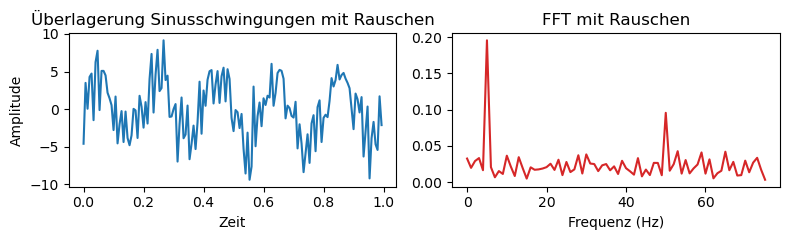

In [12]:
Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector
ff = 5;   # frequency of the signal
## --- White noise generation ---------------------------------
y_wn_0 = np.random.normal(scale=2, size=t.shape)
y_wn_1 = np.random.normal(scale=2, size=t.shape)
y_wn_2 = np.random.normal(scale=2, size=t.shape)
a1 = 4.
a2 = 2.
y =  a1 * np.sin(2 * np.pi * ff * t) + a2 * np.sin(10 * 2 * np.pi * ff * t)

a_wn = 1.0
a_f1 = 1.0
a_f2 = 0.0
wn= y_wn_0*a_wn
fn1 = np.cumsum(y_wn_1)/Fs*a_f1
fn2 = np.cumsum(np.cumsum(y_wn_2))/(Fs*Fs)*a_f2
combined = y+wn+fn1+fn2

y_normalized = np.int16((combined / combined.max()) * 32767)
yf = rfft(y_normalized)/5e6
xf = rfftfreq(len(y), 1 / Fs)

plt.figure(figsize=(8,2.5)) # Plot-Größe
plt.subplot(1,2,1)
plt.plot(t,combined)
plt.xlabel('Zeit')
plt.ylabel('Amplitude')
plt.title('Überlagerung Sinusschwingungen mit Rauschen')
plt.subplot(1,2,2)
plt.plot(xf,abs(yf),'tab:red') # plotting the spectrum
plt.xlabel('Frequenz (Hz)')
plt.ylabel('')
plt.title('FFT mit Rauschen')
plt.tight_layout()
plt.show()